# Know the Data

In [1]:
import pandas as pd

In [32]:
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Banknote_Authentication.csv")
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.tail(5)

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
data.shape

(1372, 5)

In [5]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [11]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


# Balancing The Data

In [9]:
y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X,y)
pd.Series(y).value_counts()

1    762
0    762
Name: class, dtype: int64

# Train-Test 

In [12]:
X.shape, y.shape

((1524, 4), (1524,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.2,random_state=8)

In [15]:
X_train.shape, y_train.shape

((1219, 4), (1219,))

# Scaling The Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[0.68297889, 0.87367234, 0.08781097, 0.64503487],
       [0.33333333, 0.51046172, 0.25793439, 0.81528774],
       [0.53157519, 0.35157509, 0.42466237, 0.6873619 ],
       ...,
       [0.75192725, 0.64295767, 0.26690374, 0.80012003],
       [0.30309586, 0.26951738, 0.67938915, 0.73897906],
       [0.91751581, 0.81378923, 0.11205979, 0.69312311]])

In [19]:
X_test.shape, y_test.shape

((305, 4), (305,))

# Model with Custom Activation Function

In [22]:
import pandas as pd

In [30]:
df = pd.DataFrame(data)

In [43]:
corr_matrix = df.corr()
record = corr_matrix["class"].sort_values(ascending = True)
record

variance   -0.724843
skewness   -0.444688
entropy    -0.023424
curtosis    0.155883
class       1.000000
Name: class, dtype: float64

In [57]:
col_names = record.index.drop("class")
col_names

Index(['variance', 'skewness', 'entropy', 'curtosis'], dtype='object')

In [76]:
train_col = df.columns
train_col = list(train_col.drop("class"))
train_col 

['variance', 'skewness', 'curtosis', 'entropy']

In [77]:
col_ind = []
for ele in col_names:
    col_ind.append(train_col.index(ele))
col_ind

[0, 1, 3, 2]

## Finding the best fit ks

In [119]:
from numpy import mean

In [166]:
def acti_func(layer0, k,k0):
    return np.dot(layer0, k.T)

In [167]:
k = [0 for i in range(len(col_ind))]
k0 = 0
k

[0, 0, 0, 0]

In [199]:
k, k0

(array([-0.69225359,  0.        ,  0.        ,  0.        ]), 0)

In [168]:
#Trial Run

In [169]:
learning_rate = 0.1

In [170]:
xx,X_part ,yy, y_part = train_test_split(X_train ,y_train,test_size=0.7,random_state=8)

In [171]:
k[col_ind[0]] = 2 * np.random.random() - 1 # Initialize witha value b/w -1 to 1
k

[-0.6922535887580428, 0, 0, 0]

In [172]:
layer0 = X_part      
k = np.array(k)
layer1 = np.dot(layer0, k.T) + k0
layer1.shape

(854,)

In [202]:
model = neural_network_model(X_train, y_train, 4, num_iterations=1000,k,k0)

SyntaxError: positional argument follows keyword argument (<ipython-input-202-1092b03ce9de>, line 1)

In [114]:
#cm = confusion_matrix(actual, predicted)

In [ ]:
# P = cm.sum(axis=0) - np.diag(cm)
# FN = cm.sum(axis=1) - np.diag(cm)
# TP = np.diag(cm)
# TN = cm.sum() - (FP + FN + TP)

In [120]:
k = list(k)
k[col_ind[0]] = -learning_rate*mean(net_change1)
k

[-0.03953663666588021, 0.0, 0.0, 0.0]

## Custom Model

In [185]:
from numpy import exp

In [187]:
def softmax(vector):
    e = exp(vector)
    return e / e.sum()

In [175]:
def define_structure(X, Y, h):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = h #hidden layer 
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)

In [176]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [276]:
def acti_func(layer0, k,k0):
    return layer0

def forward_propagation(X, parameters,k,k0):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = acti_func(Z1,k,k0)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [277]:
def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    try:
        m = Y.shape[1]
        # Compute the cross-entropy cost
        logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    
        cost = - np.sum(logprobs) / m
        cost = float(np.squeeze(cost))
                                    
        return cost
    except:
        m = len(Y)

In [303]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    try:
        dZ2 = A2-Y
    except:
        dZ2 = A2[1]-Y
        
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}

    return grads

        

In [304]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    try:
        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2

        parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
        return parameters
    except:
        print(dW1,db1)

In [305]:
def neural_network_model(X, Y, hidden_unit, k,k0,num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y,hidden_unit)[0]
    output_unit = define_structure(X, Y,0)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters,k,k0)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
parameters = neural_network_model(X_train, y_train, 4, k,k0,num_iterations=1000)

ValueError: operands could not be broadcast together with shapes (4,) (1219,) 

In [296]:
Y

NameError: name 'Y' is not defined

# Model Building Through Deep Learning

## Model

In [121]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [152]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))
model.add(Dense(1))

In [153]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [154]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)

In [155]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [156]:
import tensorflow as tf

In [157]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir = 'logs')
]

In [158]:
results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=60, callbacks=callbacks)

Epoch 1/60
39/39 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.6636 - val_loss: 0.5686 - val_accuracy: 0.7172
Epoch 2/60
39/39 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7867 - val_loss: 0.4820 - val_accuracy: 0.7582
Epoch 3/60
39/39 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8277 - val_loss: 0.3992 - val_accuracy: 0.8238
Epoch 4/60
39/39 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8636 - val_loss: 0.3625 - val_accuracy: 0.8689
Epoch 5/60
39/39 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9190 - val_loss: 0.2838 - val_accuracy: 0.9098
Epoch 6/60
39/39 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9415 - val_loss: 0.2323 - val_accuracy: 0.9098
Epoch 7/60
39/39 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9415 - val_loss: 0.3576 - val_accuracy: 0.8607
Epoch 8/60
39/39 [==

## Result Evaluation

In [159]:
model.evaluate(X_test,y_test,verbose=2)

10/10 - 0s - loss: 0.0342 - accuracy: 0.9902


[0.03419340029358864, 0.9901639223098755]

In [160]:
predict = model.predict(X_test)
predictions = predict > 0.5

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
confusion_matrix(y_test, predictions)

array([[151,   3],
       [  0, 151]], dtype=int64)

In [163]:
model.save('banknote_model.h5')  # creates a HDF5 file 'my_model.h5'

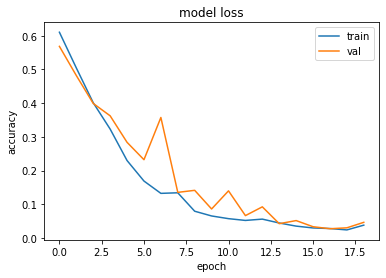

In [164]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

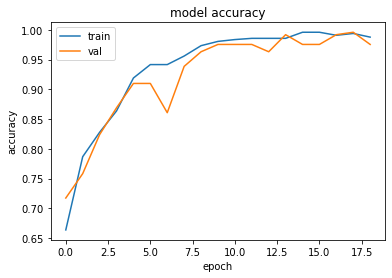

In [165]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()